# OpenSlide: How to open whole slide images

based on https://www.kaggle.com/code/naotous/openslide-how-to-open-whole-slide-images

In [1]:
from abcli import *
import os.path
import mayo_clinic_strip_ai.openslide as mcsai_openslide

in the terminal run:

```bash
abcli select
mcsai dataset download metadata
mcsai dataset download other/04414e_0.tif
```

then update `object_name` below:

In [2]:
object_name = "2022-07-12-14-04-28-56027"

mcsai.openslide.read_region(/Users/kamangir/storage/abcli/2022-07-12-14-04-28-56027/other/04414e_0.tif): (12656, 29356), 1 level(s), ((12656, 29356),) level dimension(s) - 19.08 MB


{'openslide.level-count': '1',
 'openslide.level[0].downsample': '1',
 'openslide.level[0].height': '29356',
 'openslide.level[0].tile-height': '128',
 'openslide.level[0].tile-width': '128',
 'openslide.level[0].width': '12656',
 'openslide.vendor': 'generic-tiff',
 'tiff.ResolutionUnit': 'centimeter',
 'tiff.XResolution': '10',
 'tiff.YResolution': '10'}


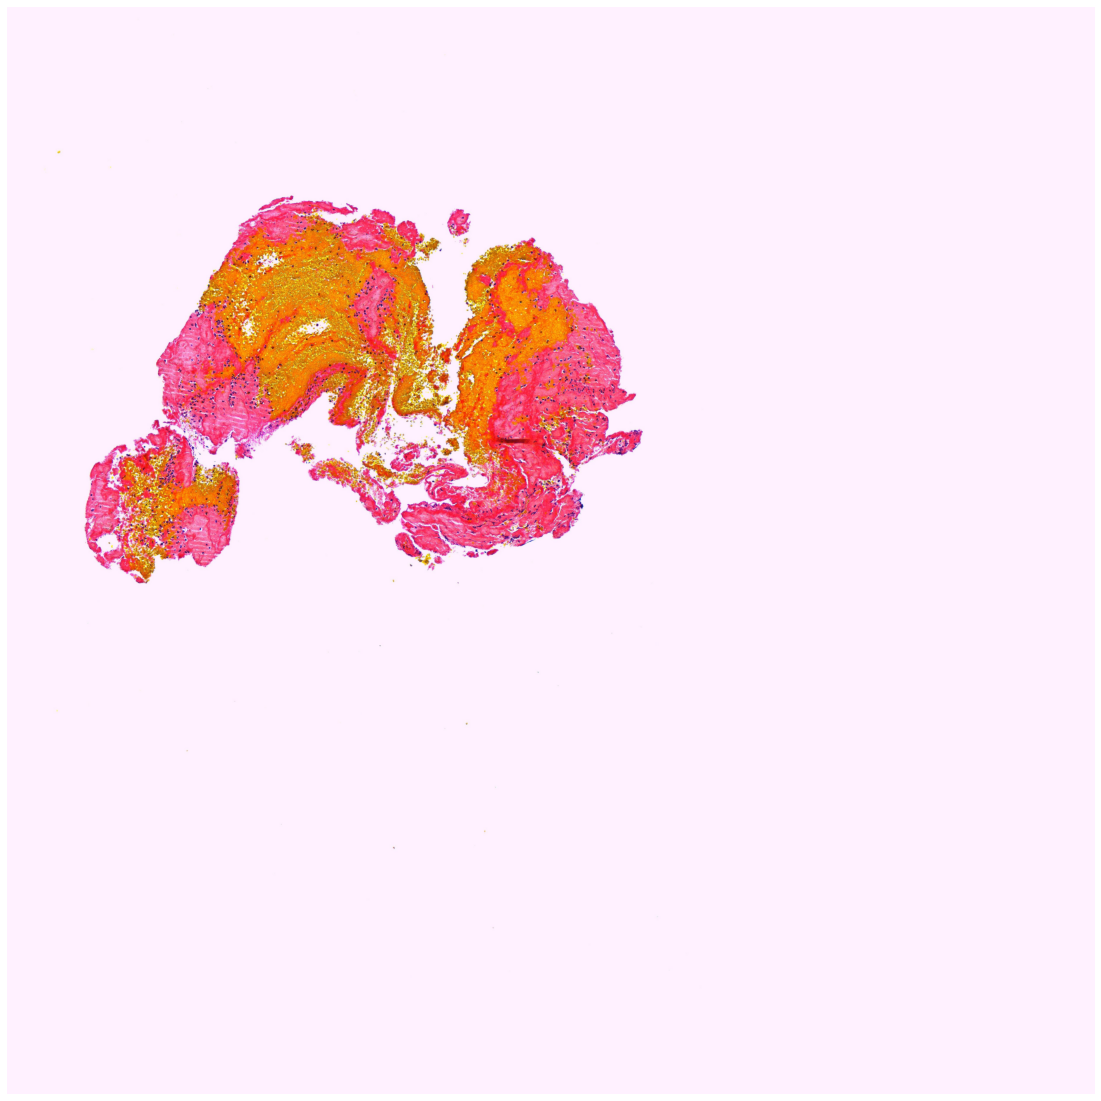

In [3]:
success, image = mcsai_openslide.read_region(
    filename=os.path.join(os.getenv("abcli_object_root") , object_name, "other/04414e_0.tif"),
    region=(0, 0),
    level=0,
    size=(5000, 5000),
    log_level=LOG_ALL,
    plot_level=PLOT_ALL)

END